In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
    
print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)

4423680/4422102 [==============================] - 1s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)


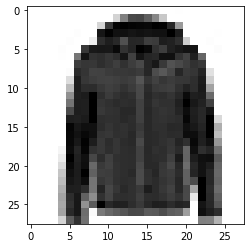

In [6]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_image(x_train[0])

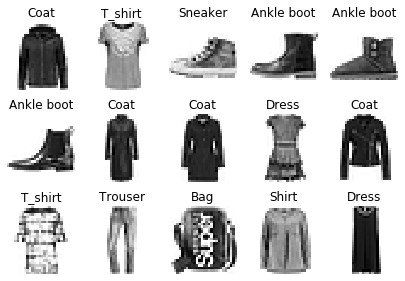

In [8]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary', interpolation = 'nearest')
            
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T_shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

Relu: 
$$y = max(0, x)$$
Softmax:
$$x = [x1, x2, x3]$$
$$y = [\frac{e^x1}{sum}, \frac{e^x2}{sum}, \frac{e^x3}{sum}]$$
$$sum = e^x1 + e^x2 + e^x3$$

In [10]:
# tf.keras.models.Sequential()
"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# reason for sparse: y is index use sparse, y is one_hot vector use categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
             optimiser='sgd',
             metrics=['accuracy'])


In [11]:
model.layers

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, epochs=10,
                   validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 220us/sample - loss: 3.3386 - accuracy: 0.6329 - val_loss: 1.1245 - val_accuracy: 0.6534
Epoch 2/10
55000/55000 [==============================] - 11s 194us/sample - loss: 1.1164 - accuracy: 0.6584 - val_loss: 0.9402 - val_accuracy: 0.6994
Epoch 3/10
55000/55000 [==============================] - 11s 192us/sample - loss: 1.2138 - accuracy: 0.6610 - val_loss: 1.0598 - val_accuracy: 0.7168
Epoch 4/10
55000/55000 [==============================] - 10s 190us/sample - loss: 1.1677 - accuracy: 0.6432 - val_loss: 1.0504 - val_accuracy: 0.6390
Epoch 5/10
55000/55000 [==============================] - 11s 207us/sample - loss: 1.2778 - accuracy: 0.6247 - val_loss: 45.9875 - val_accuracy: 0.3632
Epoch 6/10
55000/55000 [==============================] - 9s 161us/sample - loss: 1.2518 - accuracy: 0.6280 - val_loss: 1.1526 - val_accuracy: 0.6156
Epoch 7/10
55000/55000 [=====================

In [18]:
type(history)


tensorflow.python.keras.callbacks.History

In [19]:
history.history

{'loss': [3.338631237515536,
  1.116351476244493,
  1.2138399168534713,
  1.1677194246205416,
  1.277808322906494,
  1.251754132530906,
  1.2502477183168585,
  1.429821237893538,
  1.547198477528312,
  1.2892145445910368],
 'accuracy': [0.6329455,
  0.65843636,
  0.66096365,
  0.6431636,
  0.62465453,
  0.628,
  0.62816364,
  0.62921816,
  0.6256545,
  0.60774547],
 'val_loss': [1.1245087370872497,
  0.9401992569923401,
  1.0598448738098145,
  1.0504024700164796,
  45.987450830078124,
  1.152613161087036,
  1.306242637348175,
  1.390537896823883,
  1.5452851549148559,
  1.4017302635192872],
 'val_accuracy': [0.6534,
  0.6994,
  0.7168,
  0.639,
  0.3632,
  0.6156,
  0.676,
  0.6752,
  0.58,
  0.6022]}

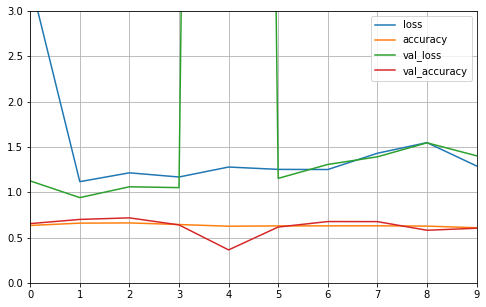

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)